In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('AabicToEnglishDatasetTwoClass.xlsx')

In [3]:
df.head()

,Unnamed: 0,Arabic,English,Class
0,0,سيئ جدا بعد الإصدار الجديد,Too bad after the new version,0
1,1,ابلكيشن زباله بجد,Really rubbish application,0
2,2,سيئ التطبيق لايعمل,Bad app not working,0
3,3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,"Unfortunately, for the worst, the application ...",0
4,4,التحديث بطيئ جدا جدا عند الفتح,The update is very slow when opening,0


In [4]:
## Get the Dependent features
X=df['Arabic']
y=df['Class']

In [5]:
X.shape

(449,)

In [6]:
y.shape

(449,)

In [7]:
import tensorflow as tf

In [8]:
tf.__version__

'2.3.0'

In [8]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [10]:
### Vocabulary size
voc_size=5000

### Onehot Representation

In [11]:
myData=X.copy()

In [12]:
myData

0                             سيئ جدا بعد الإصدار الجديد
1                                      ابلكيشن زباله بجد
2                                     سيئ التطبيق لايعمل
3      للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...
4                         التحديث بطيئ جدا جدا عند الفتح
                             ...                        
444                                 رائع وبالتوفيق يارب⚘
445                         ممكن اعرف متى راح يوصل الطلب
446                                  رئع جدا بس مفيش خصم
447                                             ممتااااز
448                                               واوووو
Name: Arabic, Length: 449, dtype: object

In [13]:
onehot_repr =[]
for w in myData :
    onehot_repr.append(one_hot(w,voc_size))
print(onehot_repr)


[[3675, 2974, 1922, 2527, 3342], [468, 2484, 2670], [3675, 39, 3129], [2529, 39, 775, 2315, 2974, 1428, 1465, 3760, 693, 4998, 4492, 3493, 706, 4624, 4492, 2761, 1138, 1771, 4190, 4390], [2207, 4857, 2974, 2974, 4596, 786], [4062, 3481, 2500, 1922, 4431, 1756, 2509, 1478, 599, 1197, 724, 514, 3628, 3864, 3075, 4589, 4023, 4479, 2748, 2515, 4987, 418, 4960, 1105, 4708, 2529], [39, 2509, 3067, 1138, 2509, 4039, 4082, 2387, 814, 1188, 2509, 3493, 850, 1111, 3764, 4113, 3523], [3900, 3675, 2974, 2500, 1244, 4973, 174, 4640, 845, 4166, 3986, 2459, 527, 1466, 1318, 2500, 4702, 3766, 3385, 199, 1756, 269, 4789, 2572], [3627, 2579, 1947], [2259, 3428, 4894], [2515, 3675, 731, 789, 168], [2529, 1456, 724, 4239], [2085, 1997, 919, 3922, 1756, 2484, 255, 2789, 4479, 2315, 910, 444, 283, 3062], [2500, 3702, 945, 2059, 379, 1868, 3561, 3052, 4533, 4644, 3578, 263, 237], [3900, 1922, 2207, 3129, 244, 779, 245, 4111, 2533, 2250, 2579, 1083, 975, 910], [3679, 2974, 14, 4439, 4715, 2250], [2457, 2974, 

### Embedding Representation

In [14]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1922 2527 3342]
 [   0    0    0 ...  468 2484 2670]
 [   0    0    0 ... 3675   39 3129]
 ...
 [   0    0    0 ... 4971 4186 4122]
 [   0    0    0 ...    0    0 2889]
 [   0    0    0 ...    0    0 2510]]


In [15]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 3675, 2974, 1922, 2527, 3342])

In [16]:
## Creating model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
#model1.add(Bidirectional(LSTM(100)))
model1.add(LSTM(100))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
len(embedded_docs),y.shape

(449, (449,))

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
Y = encoder.transform(y)

In [19]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(Y)

In [20]:
X_final.shape,y_final.shape

((449, 30), (449,))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [22]:
### Finally Training
history=model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=20)

Epoch 1/10
15/15 [==============================] - 2s 125ms/step - loss: 0.6903 - accuracy: 0.5700 - val_loss: 0.6866 - val_accuracy: 0.6510
Epoch 2/10
15/15 [==============================] - 1s 34ms/step - loss: 0.6770 - accuracy: 0.6067 - val_loss: 0.6724 - val_accuracy: 0.6309
Epoch 3/10
15/15 [==============================] - 0s 31ms/step - loss: 0.6331 - accuracy: 0.7667 - val_loss: 0.6365 - val_accuracy: 0.6577
Epoch 4/10
15/15 [==============================] - 0s 30ms/step - loss: 0.5166 - accuracy: 0.7700 - val_loss: 0.6625 - val_accuracy: 0.6376
Epoch 5/10
15/15 [==============================] - 0s 33ms/step - loss: 0.3875 - accuracy: 0.8767 - val_loss: 0.5578 - val_accuracy: 0.7517
Epoch 6/10
15/15 [==============================] - 0s 31ms/step - loss: 0.2517 - accuracy: 0.9667 - val_loss: 0.5263 - val_accuracy: 0.7383
Epoch 7/10
15/15 [==============================] - 0s 33ms/step - loss: 0.1909 - accuracy: 0.9533 - val_loss: 0.6077 - val_accuracy: 0.7584
Epoch 8/10
1

### Adding Dropout 

### Performance Metrics And Accuracy

In [23]:
y_pred=model1.predict(X_test)

In [24]:
y_pred

array([[3.67313623e-04],
       [9.11146939e-01],
       [3.42487514e-01],
       [9.53460693e-01],
       [2.72476196e-01],
       [8.29073846e-01],
       [3.81054461e-01],
       [8.67906868e-01],
       [9.76835251e-01],
       [9.20029044e-01],
       [2.62726486e-01],
       [2.27025300e-01],
       [9.66868579e-01],
       [4.55111265e-04],
       [5.90036094e-01],
       [7.70012379e-01],
       [8.36661339e-01],
       [6.60676718e-01],
       [7.46053934e-01],
       [1.60020918e-01],
       [2.05013439e-05],
       [1.35374278e-01],
       [1.89164519e-01],
       [1.64606273e-02],
       [1.58571303e-02],
       [9.28233504e-01],
       [3.78871620e-01],
       [8.96591961e-01],
       [2.31772661e-04],
       [4.02160794e-01],
       [9.06315327e-01],
       [8.69491637e-01],
       [3.70616913e-02],
       [8.81536901e-01],
       [5.07060031e-05],
       [8.09367299e-01],
       [9.92117047e-01],
       [1.74132288e-02],
       [8.47197711e-01],
       [9.37737465e-01],


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
ny_pred = (y_pred > 0.5)

In [27]:
ny_pred

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [

In [28]:
confusion_matrix(y_test,ny_pred)

array([[57, 21],
       [13, 58]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ny_pred)

0.7718120805369127

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ny_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        78
           1       0.73      0.82      0.77        71

    accuracy                           0.77       149
   macro avg       0.77      0.77      0.77       149
weighted avg       0.78      0.77      0.77       149



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


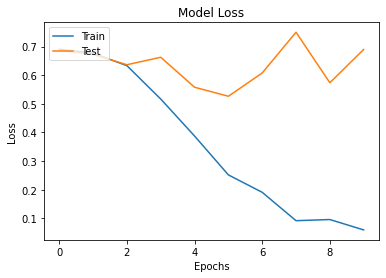

In [31]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.savefig("Loss-Graph.pdf", format="pdf", bbox_inches="tight")
plt.show()
 
 
  

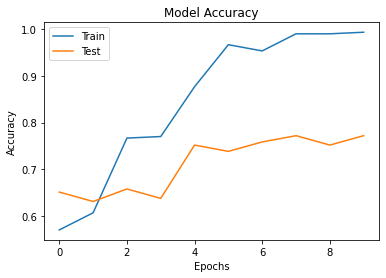

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.savefig("Accuracy-Graph.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [33]:
df = pd.DataFrame(onehot_repr)
df.to_excel("D:\ArabicResult\OneHotArabic.xlsx")

In [34]:
df = pd.DataFrame(embedded_docs)
df.to_excel("D:\ArabicResult\EmbededArabic.xlsx")


In [35]:
df = pd.DataFrame(X_train)
df.to_excel("D:\ArabicResult\X_trainArabic.xlsx")


In [36]:
df = pd.DataFrame(X_test)
df.to_excel("D:\ArabicResult\X_testArabic.xlsx")


In [37]:
df = pd.DataFrame(y_train)
df.to_excel("D:\ArabicResult\y_trainArabic.xlsx")


In [38]:
df = pd.DataFrame(y_test)
df.to_excel("D:\ArabicResult\y_test Arabic.xlsx")


In [39]:
df = pd.DataFrame(y_pred)
df.to_excel("D:\ArabicResult\y_predArabic.xlsx")


In [40]:
df = pd.DataFrame(ny_pred)
df.to_excel("D:\ArabicResult\Yvalue_predArabicVal.xlsx")
